<a href="https://colab.research.google.com/github/darja/NeuralUni/blob/master/01_mnist_light_ryazhskikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр из набора данных MNIST – Light

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

## Подготовка данных для обучения сети

In [2]:
# В Keras встроены средства работы с популярными наборами данных
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train.astype('float32')
x_train = x_train / 255 

# Преобразуем метки в формат one hot encoding
y_train = utils.to_categorical(y_train_org, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# print(x_train[5])

## Подготовка нейронной сети

Утилиты

In [0]:
# Структура для хранения параметров нейронной сети
class FitConfig:
  def __init__(self, dense, validation_split = 0.1, epochs = 80, batch_size = 100):
    self.validation_split = validation_split
    self.dense = dense
    self.epochs = epochs
    self.batch_size = batch_size
    
  def __str__(self):
    return "Dense {}, validation split {}, epochs {}, batch_size {}".format(self.dense, self.validation_split, self.epochs, self.batch_size)
  
  def csv(self):
    return "{};{};{};{}".format(self.dense, self.epochs, self.validation_split, self.batch_size)
  
  def plot_title(self):
    return "Dense {}".format(self.dense)
  
# Структура для хранения обученной сети и результатов обучения
class FitResult:
  def __init__(self, _config, _model, _history):
    self.config = _config
    self.model = _model
    self.history = _history
        
  
# Функция для создания и тренировки нейронной сети с заданными параметрами
def fit(config):
  model = Sequential()

  # Уровни сети
  input_dimen = 784
  for dense in config.dense:
    model.add(Dense(dense, input_dim=input_dimen, activation="relu"))
    input_dimen = dense

  model.add(Dense(10, activation="softmax"))

  # Компиляция
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  print(model.summary())

  # Обучение
  history = model.fit(x_train, y_train, batch_size=config.batch_size, epochs=config.epochs, validation_split=config.validation_split, verbose=1)
  
  return FitResult(config, model, history)

### Обучение нейронных сетей с различными параметрами

In [5]:
configs = [
#     FitConfig([1]),
#     FitConfig([1, 1, 1]),
#     FitConfig([10]),
#     FitConfig([10, 10]),
#     FitConfig([10, 10, 10]),
    FitConfig([100]),
    FitConfig([100, 200]),
    FitConfig([200, 100]),
    FitConfig([400]),
    FitConfig([400, 100]),
    FitConfig([400, 400]),
    FitConfig([800, 800]),
    FitConfig([800]),
    FitConfig([1000]),
    FitConfig([2000]),
]

i = 1
n = len(configs)

results = []

for config in configs:
  print("++++++++++++++++++++++++++++ {} of {} ++++++++++++++++++++++++++++++".format(i, n))
  print(config)
  print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

  i += 1
  
  res = fit(config)
  results.append(res)
  

++++++++++++++++++++++++++++ 1 of 10 ++++++++++++++++++++++++++++++
Dense [100], validation split 0.1, epochs 80, batch_size 100
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/80
54000/54000 [==============================] - 3s 59us/sample - loss: 0.3722 - acc: 0.8965 - val_loss: 0.1654 - val_acc: 0.9572
Epoch 2/80
54000/54000 

Результаты обучения

In [6]:
for res in results:
  print("{} | {}".format(res.history.history["val_acc"][-1], res.config))

0.9700000286102295 | Dense [100], validation split 0.1, epochs 80, batch_size 100
0.9853333234786987 | Dense [100, 200], validation split 0.1, epochs 80, batch_size 100
0.9851666688919067 | Dense [200, 100], validation split 0.1, epochs 80, batch_size 100
0.984666645526886 | Dense [400], validation split 0.1, epochs 80, batch_size 100
0.9851666688919067 | Dense [400, 100], validation split 0.1, epochs 80, batch_size 100
0.9860000014305115 | Dense [400, 400], validation split 0.1, epochs 80, batch_size 100
0.9829999804496765 | Dense [800, 800], validation split 0.1, epochs 80, batch_size 100
0.9871666431427002 | Dense [800], validation split 0.1, epochs 80, batch_size 100
0.9853333234786987 | Dense [1000], validation split 0.1, epochs 80, batch_size 100
0.9829999804496765 | Dense [2000], validation split 0.1, epochs 80, batch_size 100


Графики обучения

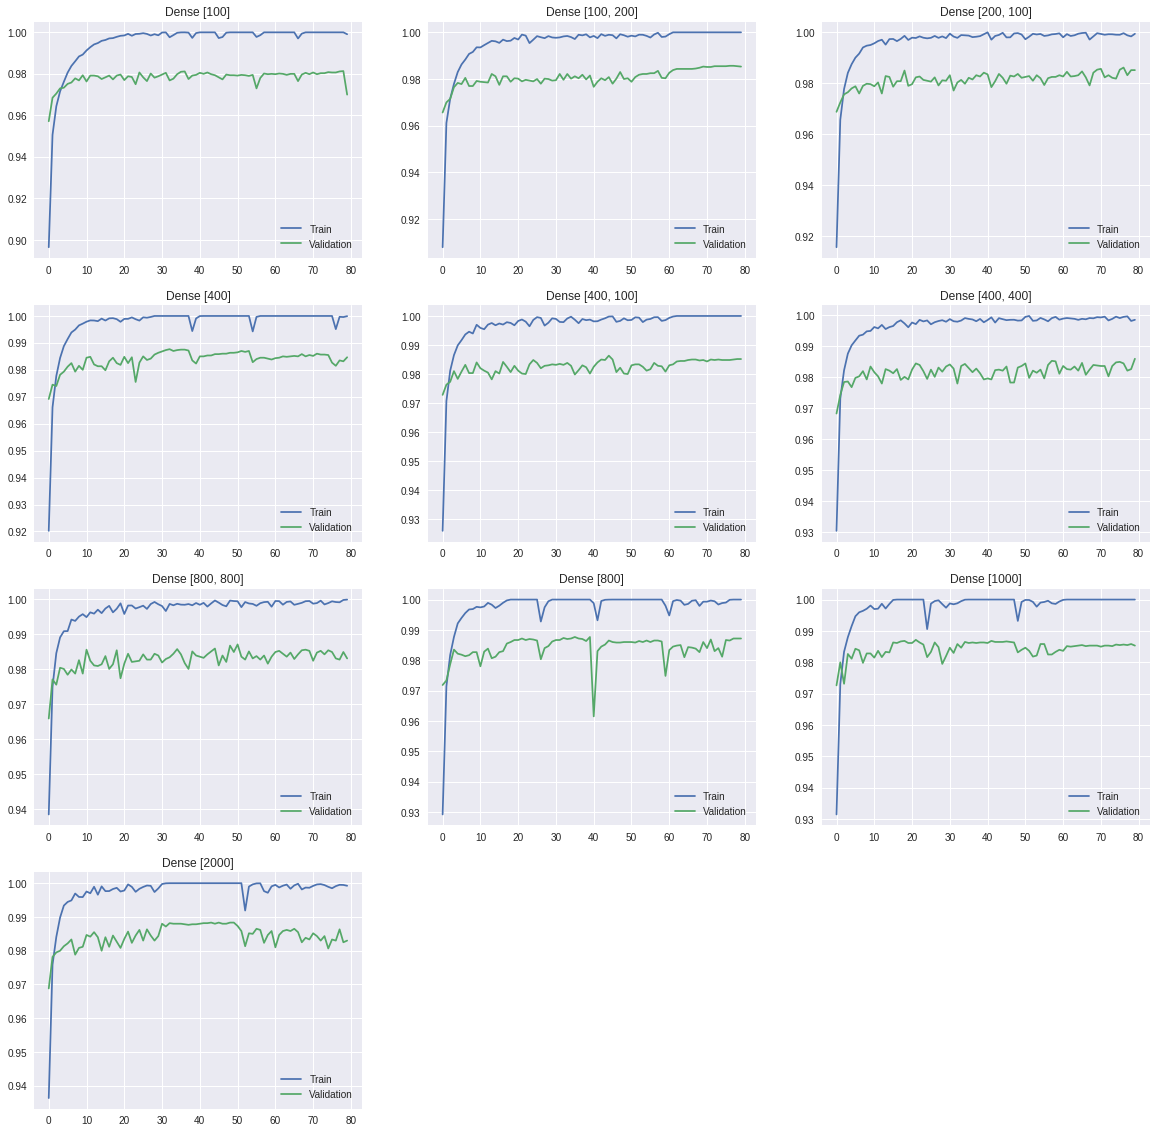

In [23]:
figure = plt.figure(figsize=(20, 20))

i = 0
cols = 3
rows = math.ceil(len(results) / cols)

for res in results:
  history = res.history.history
  
  cell = plt.subplot2grid((rows, cols), (i // cols, i % cols), fig = figure)
  cell.plot(history['acc'], label='Train')
  cell.plot(history['val_acc'], label='Validation')
  cell.set_title(res.config.plot_title())
  cell.legend()
  
  i += 1
  
plt.show()

## Проверка на тестовой выборке

In [0]:
def predictInTest(model, n_rec):
  x = x_test[n_rec]
  x = np.expand_dims(x, axis=0)

  prediction = model.predict(x)
  prediction = np.argmax(prediction)
#   print("Predicted: [{}], expected [{}]".format(prediction, y_test_org[n_rec]))
  return prediction == y_test_org[n_rec]
  
def predictAllInTest(model):
  correct = 0
  n = len(x_test)
  for i in range(0, n):
    correct += 1 if predictInTest(model, i) else 0
      
  return correct

In [16]:
n = len(x_test)
test_acc = []
for res in results:
  print("Checking ", res.config)
  model = res.model
  correct = predictAllInTest(model)
  test_acc.append(correct / n)
  

Checking  Dense [100], validation split 0.1, epochs 80, batch_size 100
Checking  Dense [100, 200], validation split 0.1, epochs 80, batch_size 100
Checking  Dense [200, 100], validation split 0.1, epochs 80, batch_size 100
Checking  Dense [400], validation split 0.1, epochs 80, batch_size 100
Checking  Dense [400, 100], validation split 0.1, epochs 80, batch_size 100
Checking  Dense [400, 400], validation split 0.1, epochs 80, batch_size 100
Checking  Dense [800, 800], validation split 0.1, epochs 80, batch_size 100
Checking  Dense [800], validation split 0.1, epochs 80, batch_size 100
Checking  Dense [1000], validation split 0.1, epochs 80, batch_size 100
Checking  Dense [2000], validation split 0.1, epochs 80, batch_size 100


In [17]:
print(test_acc)
print("Accuracy on test set;Accuracy on training set;Validation accuracy;Model")
for i in range(0, len(results)):
  config = results[i].config
  history = results[i].history.history
  print("{};{};{};{}".format(test_acc[i], history["acc"][-1], history["val_acc"][-1], config))  


[0.9688, 0.9823, 0.9805, 0.9837, 0.985, 0.9825, 0.9832, 0.9839, 0.9849, 0.9843]
Accuracy on test set;Accuracy on training set;Validation accuracy;Model
0.9688;0.9990925788879395;0.9700000286102295;Dense [100], validation split 0.1, epochs 80, batch_size 100
0.9823;1.0;0.9853333234786987;Dense [100, 200], validation split 0.1, epochs 80, batch_size 100
0.9805;0.9993888735771179;0.9851666688919067;Dense [200, 100], validation split 0.1, epochs 80, batch_size 100
0.9837;0.9999259114265442;0.984666645526886;Dense [400], validation split 0.1, epochs 80, batch_size 100
0.985;1.0;0.9851666688919067;Dense [400, 100], validation split 0.1, epochs 80, batch_size 100
0.9825;0.9985740780830383;0.9860000014305115;Dense [400, 400], validation split 0.1, epochs 80, batch_size 100
0.9832;0.9998148083686829;0.9829999804496765;Dense [800, 800], validation split 0.1, epochs 80, batch_size 100
0.9839;1.0;0.9871666431427002;Dense [800], validation split 0.1, epochs 80, batch_size 100
0.9849;1.0;0.985333323

Графики точностей нейросетей, выдававших точность больше 90%

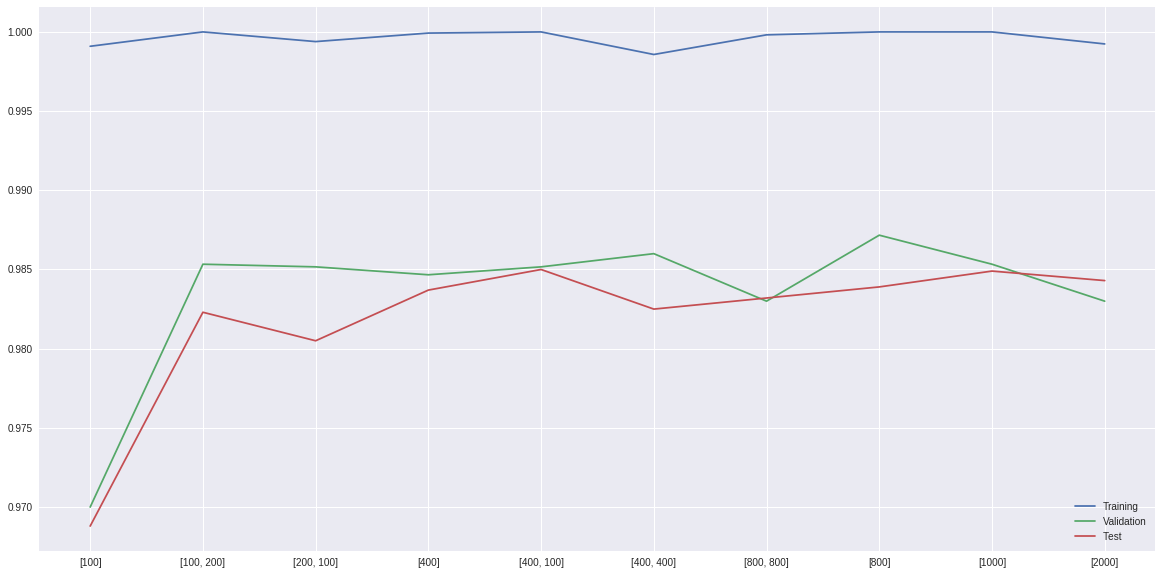

In [20]:
x_titles = list(map(lambda x: x.config.dense, results))
y = test_acc * 100
figure = plt.figure(figsize=(20, 10))

acc_list = list(map(lambda x: x.history.history["acc"][-1], results))
val_acc_list = list(map(lambda x: x.history.history["val_acc"][-1], results))
xticks = x_titles

plt.plot(acc_list, label="Training")
plt.plot(val_acc_list, label="Validation")
plt.plot(test_acc, label="Test")
plt.xticks(range(len(xticks)), xticks)
plt.legend()
plt.show()


## Распознавание пользовательских изображений

In [21]:
files.upload()

Saving 8.png to 8.png


{'8.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x02\x00\x00\x00\xfdoH\xc3\x00\x00\x00\tpHYs\x00\x005\xd4\x00\x005\xd4\x01^e\xe5\x08\x00\x00\x03\xbdIDATH\x89\x8dV;KsM\x10\x9e\xddsr\x85$\x10\x14\xbc5\x06\x14\xad\x14\x0b\xb10D\xb1\x14\xc4* \xf6b\x91\xc6\x1f AE\x02)R\x88\x88A\xd2\x88Xh\x10,l$\x08\x16\xb1\x10D-,\x82\x1a\x14A1h\x82F0\x97\xbd|\xc5\xbc\xef\xba\xef1\xca7\xd5\x9egg\x9f}vfv\xf6\x10)%42)%!D\x08A)\xc5O\x00 \x84\x00\x00\x82RJ)\xa5\x9a\xc5)4\xf2\x13\xa9\xc5\x14\xbb\xbe\r!D\xdfL\x19\xfd\x85\x881\xc69\x07\x00\xce\xb9\x10\x02\x89(\xa5\x88##!\xc4\xc2\xf8\x9bR\xce\xb9a\x18j\xc09\xbf\xbe\xbe\xce\xe5r\x85B\xc1\xeb\xf5\x0e\x0e\x0evvv*\xb1*\x0e_\xb1\xfb\xc98\xe7\xb7\xb7\xb7KKK###\x0e\x87\x03\x00l6[ss\xb3\xdb\xedv\xbb\xdd\xa9TJ\xb9Y\x16\xfeF\x1a\x8b\xc5(\xa5\xed\xed\xed\xb3\xb3\xb3\xbb\xbb\xbb\xe7\xe7\xe7\xaf\xaf\xafR\xca\xf7\xf7\xf7\xb9\xb9\xb9\xee\xeen\xc6\x18cLJ)\x84\xf8_\xa4\xd9l\xd60\x8c\xf5\xf5\xf5j\xb5*\x84\xa8\xd7\xeb\x88\x0b!\x84\x10\xd9l\x96\x10R*\

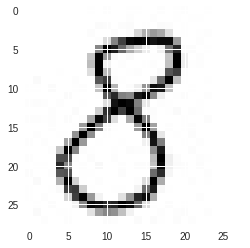

3 | Dense [100], validation split 0.1, epochs 80, batch_size 100
3 | Dense [100, 200], validation split 0.1, epochs 80, batch_size 100
3 | Dense [200, 100], validation split 0.1, epochs 80, batch_size 100
3 | Dense [400], validation split 0.1, epochs 80, batch_size 100
3 | Dense [400, 100], validation split 0.1, epochs 80, batch_size 100
3 | Dense [400, 400], validation split 0.1, epochs 80, batch_size 100
3 | Dense [800, 800], validation split 0.1, epochs 80, batch_size 100
3 | Dense [800], validation split 0.1, epochs 80, batch_size 100
3 | Dense [1000], validation split 0.1, epochs 80, batch_size 100
3 | Dense [2000], validation split 0.1, epochs 80, batch_size 100


In [22]:
img_path = '8.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
plt.imshow(img.convert('RGBA'))
plt.show()

# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

for res in results:
  prediction = res.model.predict(x)
  print("{} | {}".format(np.argmax(prediction), res.config))

# Результаты

## Точность обучения и распознавания

### 18 epochs

#### Batch size 100

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model                                                               | 
|----------------------|--------------------------|---------------------|---------------------------------------------------------------------| 
| 0.9831               | 0.9998148083686829       | 0.984499990940094   | Dense [400], validation split 0.1, epochs 18, batch_size 100        | 
| 0.9827               | 0.998962938785553        | 0.9828333258628845  | Dense [2000], validation split 0.1, epochs 18, batch_size 100       | 
| 0.9817               | 0.9961481690406799       | 0.9818333387374878  | Dense [800, 800], validation split 0.1, epochs 18, batch_size 100   | 
| 0.9812               | 0.9970740675926208       | 0.9836666584014893  | Dense [400, 400], validation split 0.1, epochs 18, batch_size 100   | 
| 0.9811               | 0.9970555305480957       | 0.9826666712760925  | Dense [800], validation split 0.1, epochs 18, batch_size 100        | 
| 0.9804               | 0.9980370402336121       | 0.98416668176651    | Dense [1000], validation split 0.1, epochs 18, batch_size 100       | 
| 0.9798               | 0.9972777962684631       | 0.9823333621025085  | Dense [200, 100], validation split 0.1, epochs 18, batch_size 100   | 
| 0.9784               | 0.9976111054420471       | 0.9800000190734863  | Dense [100, 200], validation split 0.1, epochs 18, batch_size 100   | 
| 0.9778               | 0.9973148107528687       | 0.9773333072662354  | Dense [100], validation split 0.1, epochs 18, batch_size 100        | 
| 0.9763               | 0.996833324432373        | 0.9786666631698608  | Dense [400, 100], validation split 0.1, epochs 18, batch_size 100   | 
| 0.9285               | 0.9447592496871948       | 0.9455000162124634  | Dense [10, 10, 10], validation split 0.1, epochs 18, batch_size 100 | 
| 0.9171               | 0.9370185136795044       | 0.9448333382606506  | Dense [10, 10], validation split 0.1, epochs 18, batch_size 100     | 
| 0.9115               | 0.9407036900520325       | 0.9468333125114441  | Dense [10], validation split 0.1, epochs 18, batch_size 100         | 
| 0.1981               | 0.3379444479942322       | 0.3551666736602783  | Dense [1], validation split 0.1, epochs 18, batch_size 100          | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | Dense [1, 1, 1], validation split 0.1, epochs 18, batch_size 100    | 


#### Batch size 200

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model                                                               | 
|----------------------|--------------------------|---------------------|---------------------------------------------------------------------| 
| 0.9857               | 1.0                      | 0.9865000247955322  | Dense [2000], validation split 0.1, epochs 18, batch_size 200       | 
| 0.9835               | 0.9999814629554749       | 0.9853333234786987  | Dense [1000], validation split 0.1, epochs 18, batch_size 200       | 
| 0.9824               | 0.9999629855155945       | 0.984666645526886   | Dense [400], validation split 0.1, epochs 18, batch_size 200        | 
| 0.9822               | 0.9993888735771179       | 0.9838333129882812  | Dense [400, 100], validation split 0.1, epochs 18, batch_size 200   | 
| 0.9812               | 0.998462975025177        | 0.9815000295639038  | Dense [800], validation split 0.1, epochs 18, batch_size 200        | 
| 0.9796               | 0.9964814782142639       | 0.9789999723434448  | Dense [400, 400], validation split 0.1, epochs 18, batch_size 200   | 
| 0.9783               | 0.9977592825889587       | 0.9778333306312561  | Dense [100, 200], validation split 0.1, epochs 18, batch_size 200   | 
| 0.9779               | 0.9973703622817993       | 0.9800000190734863  | Dense [200, 100], validation split 0.1, epochs 18, batch_size 200   | 
| 0.9778               | 0.9947222471237183       | 0.9779999852180481  | Dense [100], validation split 0.1, epochs 18, batch_size 200        | 
| 0.9764               | 0.9978148341178894       | 0.9818333387374878  | Dense [800, 800], validation split 0.1, epochs 18, batch_size 200   | 
| 0.9204               | 0.9399444460868835       | 0.9409999847412109  | Dense [10, 10, 10], validation split 0.1, epochs 18, batch_size 200 | 
| 0.9137               | 0.9415925741195679       | 0.9466666579246521  | Dense [10, 10], validation split 0.1, epochs 18, batch_size 200     | 
| 0.9084               | 0.9356111288070679       | 0.9453333616256714  | Dense [10], validation split 0.1, epochs 18, batch_size 200         | 
| 0.1979               | 0.3476296365261078       | 0.34299999475479126 | Dense [1], validation split 0.1, epochs 18, batch_size 200          | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | Dense [1, 1, 1], validation split 0.1, epochs 18, batch_size 200    | 


#### Batch size 300

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model                                                               | 
|----------------------|--------------------------|---------------------|---------------------------------------------------------------------| 
| 0.9835               | 0.9999629855155945       | 0.9860000014305115  | Dense [1000], validation split 0.1, epochs 18, batch_size 300       | 
| 0.9832               | 1.0                      | 0.9861666560173035  | Dense [2000], validation split 0.1, epochs 18, batch_size 300       | 
| 0.9824               | 0.9999814629554749       | 0.9853333234786987  | Dense [800], validation split 0.1, epochs 18, batch_size 300        | 
| 0.9821               | 0.9962592720985413       | 0.9825000166893005  | Dense [800, 800], validation split 0.1, epochs 18, batch_size 300   | 
| 0.9805               | 0.9996111392974854       | 0.9823333621025085  | Dense [400], validation split 0.1, epochs 18, batch_size 300        | 
| 0.9794               | 0.9976111054420471       | 0.9826666712760925  | Dense [400, 100], validation split 0.1, epochs 18, batch_size 300   | 
| 0.9782               | 0.9982222318649292       | 0.9794999957084656  | Dense [400, 400], validation split 0.1, epochs 18, batch_size 300   | 
| 0.9768               | 0.9988703727722168       | 0.9801666736602783  | Dense [200, 100], validation split 0.1, epochs 18, batch_size 300   | 
| 0.9747               | 0.9970555305480957       | 0.9756666421890259  | Dense [100, 200], validation split 0.1, epochs 18, batch_size 300   | 
| 0.9746               | 0.992981493473053        | 0.9789999723434448  | Dense [100], validation split 0.1, epochs 18, batch_size 300        | 
| 0.9193               | 0.9384444355964661       | 0.9461666941642761  | Dense [10, 10], validation split 0.1, epochs 18, batch_size 300     | 
| 0.9166               | 0.9363889098167419       | 0.9401666522026062  | Dense [10], validation split 0.1, epochs 18, batch_size 300         | 
| 0.9117               | 0.9333148002624512       | 0.9390000104904175  | Dense [10, 10, 10], validation split 0.1, epochs 18, batch_size 300 | 
| 0.1952               | 0.3007592558860779       | 0.3100000023841858  | Dense [1], validation split 0.1, epochs 18, batch_size 300          | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | Dense [1, 1, 1], validation split 0.1, epochs 18, batch_size 300    | 


### 30 epochs

#### Batch size 100

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model                                                               | 
|----------------------|--------------------------|---------------------|---------------------------------------------------------------------| 
| 0.9858               | 1.0                      | 0.9883333444595337  | Dense [2000], validation split 0.1, epochs 30, batch_size 100       | 
| 0.9834               | 0.9993888735771179       | 0.9829999804496765  | Dense [1000], validation split 0.1, epochs 30, batch_size 100       | 
| 0.9827               | 1.0                      | 0.9856666922569275  | Dense [400], validation split 0.1, epochs 30, batch_size 100        | 
| 0.9826               | 0.9976296424865723       | 0.984333336353302   | Dense [400, 400], validation split 0.1, epochs 30, batch_size 100   | 
| 0.9814               | 0.9986851811408997       | 0.9826666712760925  | Dense [200, 100], validation split 0.1, epochs 30, batch_size 100   | 
| 0.9813               | 0.9952407479286194       | 0.9818333387374878  | Dense [800], validation split 0.1, epochs 30, batch_size 100        | 
| 0.9809               | 0.9977962970733643       | 0.9791666865348816  | Dense [800, 800], validation split 0.1, epochs 30, batch_size 100   | 
| 0.9808               | 0.9975740909576416       | 0.9828333258628845  | Dense [400, 100], validation split 0.1, epochs 30, batch_size 100   | 
| 0.9780               | 0.9998703598976135       | 0.9825000166893005  | Dense [100], validation split 0.1, epochs 30, batch_size 100        | 
| 0.9752               | 0.9996851682662964       | 0.9768333435058594  | Dense [100, 200], validation split 0.1, epochs 30, batch_size 100   | 
| 0.9257               | 0.9486851692199707       | 0.9471666812896729  | Dense [10, 10], validation split 0.1, epochs 30, batch_size 100     | 
| 0.9093               | 0.9460370540618896       | 0.9474999904632568  | Dense [10], validation split 0.1, epochs 30, batch_size 100         | 
| 0.8822               | 0.9405184984207153       | 0.9403333067893982  | Dense [10, 10, 10], validation split 0.1, epochs 30, batch_size 100 | 
| 0.1963               | 0.4028148055076599       | 0.40966665744781494 | Dense [1], validation split 0.1, epochs 30, batch_size 100          | 
| 0.1963               | 0.39407408237457275      | 0.4065000116825104  | Dense [1, 1, 1], validation split 0.1, epochs 30, batch_size 100    | 


#### Batch size 200

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model                                                               | 
|----------------------|--------------------------|---------------------|---------------------------------------------------------------------| 
| 0.9857               | 1.0                      | 0.9861666560173035  | Dense [400, 400], validation split 0.1, epochs 30, batch_size 200   | 
| 0.9854               | 1.0                      | 0.9871666431427002  | Dense [2000], validation split 0.1, epochs 30, batch_size 200       | 
| 0.9844               | 1.0                      | 0.9854999780654907  | Dense [1000], validation split 0.1, epochs 30, batch_size 200       | 
| 0.9838               | 1.0                      | 0.9868333339691162  | Dense [800], validation split 0.1, epochs 30, batch_size 200        | 
| 0.9821               | 0.9991481304168701       | 0.9838333129882812  | Dense [800, 800], validation split 0.1, epochs 30, batch_size 200   | 
| 0.9819               | 1.0                      | 0.984499990940094   | Dense [400], validation split 0.1, epochs 30, batch_size 200        | 
| 0.9772               | 0.9953333139419556       | 0.9789999723434448  | Dense [100, 200], validation split 0.1, epochs 30, batch_size 200   | 
| 0.9771               | 0.9861666560173035       | 0.9803333282470703  | Dense [400, 100], validation split 0.1, epochs 30, batch_size 200   | 
| 0.9754               | 0.9996296167373657       | 0.9786666631698608  | Dense [100], validation split 0.1, epochs 30, batch_size 200        | 
| 0.9746               | 0.9976296424865723       | 0.9773333072662354  | Dense [200, 100], validation split 0.1, epochs 30, batch_size 200   | 
| 0.9274               | 0.9452962875366211       | 0.9456666707992554  | Dense [10, 10], validation split 0.1, epochs 30, batch_size 200     | 
| 0.9184               | 0.9420555830001831       | 0.9508333206176758  | Dense [10], validation split 0.1, epochs 30, batch_size 200         | 
| 0.8905               | 0.9467037320137024       | 0.9449999928474426  | Dense [10, 10, 10], validation split 0.1, epochs 30, batch_size 200 | 
| 0.1965               | 0.37405556440353394      | 0.38316667079925537 | Dense [1], validation split 0.1, epochs 30, batch_size 200          | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | Dense [1, 1, 1], validation split 0.1, epochs 30, batch_size 200    | 


#### Batch size 300

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model                                                               | 
|----------------------|--------------------------|---------------------|---------------------------------------------------------------------| 
| 0.9851               | 0.999740719795227        | 0.984499990940094   | Dense [800, 800], validation split 0.1, epochs 30, batch_size 300   | 
| 0.9839               | 1.0                      | 0.9865000247955322  | Dense [2000], validation split 0.1, epochs 30, batch_size 300       | 
| 0.9836               | 0.9999444484710693       | 0.9863333106040955  | Dense [400, 400], validation split 0.1, epochs 30, batch_size 300   | 
| 0.9834               | 1.0                      | 0.9853333234786987  | Dense [800], validation split 0.1, epochs 30, batch_size 300        | 
| 0.9829               | 1.0                      | 0.9851666688919067  | Dense [1000], validation split 0.1, epochs 30, batch_size 300       | 
| 0.9821               | 0.9993333220481873       | 0.9823333621025085  | Dense [400, 100], validation split 0.1, epochs 30, batch_size 300   | 
| 0.9812               | 1.0                      | 0.9836666584014893  | Dense [200, 100], validation split 0.1, epochs 30, batch_size 300   | 
| 0.9805               | 1.0                      | 0.9821666479110718  | Dense [400], validation split 0.1, epochs 30, batch_size 300        | 
| 0.9774               | 0.9993518590927124       | 0.9815000295639038  | Dense [100, 200], validation split 0.1, epochs 30, batch_size 300   | 
| 0.9755               | 0.9986851811408997       | 0.9773333072662354  | Dense [100], validation split 0.1, epochs 30, batch_size 300        | 
| 0.9317               | 0.9493333101272583       | 0.9523333311080933  | Dense [10, 10, 10], validation split 0.1, epochs 30, batch_size 300 | 
| 0.9107               | 0.9434629678726196       | 0.9480000138282776  | Dense [10, 10], validation split 0.1, epochs 30, batch_size 300     | 
| 0.9098               | 0.9384258985519409       | 0.9434999823570251  | Dense [10], validation split 0.1, epochs 30, batch_size 300         | 
| 0.2120               | 0.30335184931755066      | 0.30799999833106995 | Dense [1], validation split 0.1, epochs 30, batch_size 300          | 
| 0.2112               | 0.3151296377182007       | 0.3306666612625122  | Dense [1, 1, 1], validation split 0.1, epochs 30, batch_size 300    | 


### 40 epochs

#### Batch size 100

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model                                                               | 
|----------------------|--------------------------|---------------------|---------------------------------------------------------------------| 
| 0.9856               | 1.0                      | 0.9868333339691162  | Dense [800], validation split 0.1, epochs 40, batch_size 100        | 
| 0.9852               | 1.0                      | 0.9865000247955322  | Dense [1000], validation split 0.1, epochs 40, batch_size 100       | 
| 0.9852               | 0.9992407560348511       | 0.9854999780654907  | Dense [2000], validation split 0.1, epochs 40, batch_size 100       | 
| 0.9832               | 0.9999444484710693       | 0.98416668176651    | Dense [400], validation split 0.1, epochs 40, batch_size 100        | 
| 0.9819               | 0.998370349407196        | 0.981166660785675   | Dense [400, 100], validation split 0.1, epochs 40, batch_size 100   | 
| 0.9817               | 0.9978333115577698       | 0.9828333258628845  | Dense [800, 800], validation split 0.1, epochs 40, batch_size 100   | 
| 0.9813               | 0.9993703961372375       | 0.9793333411216736  | Dense [400, 400], validation split 0.1, epochs 40, batch_size 100   | 
| 0.9782               | 0.9969629645347595       | 0.9801666736602783  | Dense [100, 200], validation split 0.1, epochs 40, batch_size 100   | 
| 0.9754               | 0.9996481537818909       | 0.9818333387374878  | Dense [100], validation split 0.1, epochs 40, batch_size 100        | 
| 0.9730               | 0.9977037310600281       | 0.9771666526794434  | Dense [200, 100], validation split 0.1, epochs 40, batch_size 100   | 
| 0.9250               | 0.953499972820282        | 0.9524999856948853  | Dense [10, 10], validation split 0.1, epochs 40, batch_size 100     | 
| 0.9197               | 0.951796293258667        | 0.949833333492279   | Dense [10, 10, 10], validation split 0.1, epochs 40, batch_size 100 | 
| 0.9054               | 0.9457963109016418       | 0.9451666474342346  | Dense [10], validation split 0.1, epochs 40, batch_size 100         | 
| 0.1964               | 0.4018518626689911       | 0.40933331847190857 | Dense [1], validation split 0.1, epochs 40, batch_size 100          | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | Dense [1, 1, 1], validation split 0.1, epochs 40, batch_size 100    | 


#### Batch size 200

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model                                                               | 
|----------------------|--------------------------|---------------------|---------------------------------------------------------------------| 
| 0.9862               | 1.0                      | 0.987333357334137   | Dense [2000], validation split 0.1, epochs 40, batch_size 200       | 
| 0.9853               | 1.0                      | 0.987500011920929   | Dense [400, 400], validation split 0.1, epochs 40, batch_size 200   | 
| 0.9842               | 1.0                      | 0.9851666688919067  | Dense [400, 100], validation split 0.1, epochs 40, batch_size 200   | 
| 0.9838               | 1.0                      | 0.984499990940094   | Dense [1000], validation split 0.1, epochs 40, batch_size 200       | 
| 0.9835               | 1.0                      | 0.9856666922569275  | Dense [800], validation split 0.1, epochs 40, batch_size 200        | 
| 0.9829               | 0.9988148212432861       | 0.9838333129882812  | Dense [800, 800], validation split 0.1, epochs 40, batch_size 200   | 
| 0.9828               | 0.9987778067588806       | 0.9848333597183228  | Dense [400], validation split 0.1, epochs 40, batch_size 200        | 
| 0.9815               | 1.0                      | 0.984000027179718   | Dense [200, 100], validation split 0.1, epochs 40, batch_size 200   | 
| 0.9787               | 0.9999814629554749       | 0.9833333492279053  | Dense [100, 200], validation split 0.1, epochs 40, batch_size 200   | 
| 0.9764               | 0.9994999766349792       | 0.9786666631698608  | Dense [100], validation split 0.1, epochs 40, batch_size 200        | 
| 0.9226               | 0.9508888721466064       | 0.9513333439826965  | Dense [10, 10, 10], validation split 0.1, epochs 40, batch_size 200 | 
| 0.9170               | 0.9472963213920593       | 0.9456666707992554  | Dense [10, 10], validation split 0.1, epochs 40, batch_size 200     | 
| 0.9154               | 0.9455925822257996       | 0.9483333230018616  | Dense [10], validation split 0.1, epochs 40, batch_size 200         | 
| 0.2128               | 0.34983333945274353      | 0.3684999942779541  | Dense [1], validation split 0.1, epochs 40, batch_size 200          | 
| 0.1964               | 0.4054444432258606       | 0.40683332085609436 | Dense [1, 1, 1], validation split 0.1, epochs 40, batch_size 200    | 


#### Batch size 300

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model                                                               | 
|----------------------|--------------------------|---------------------|---------------------------------------------------------------------| 
| 0.9850               | 1.0                      | 0.9858333468437195  | Dense [800, 800], validation split 0.1, epochs 40, batch_size 300   | 
| 0.9845               | 1.0                      | 0.9853333234786987  | Dense [400, 400], validation split 0.1, epochs 40, batch_size 300   | 
| 0.9833               | 1.0                      | 0.9838333129882812  | Dense [400, 100], validation split 0.1, epochs 40, batch_size 300   | 
| 0.9832               | 1.0                      | 0.9865000247955322  | Dense [2000], validation split 0.1, epochs 40, batch_size 300       | 
| 0.9831               | 1.0                      | 0.9860000014305115  | Dense [1000], validation split 0.1, epochs 40, batch_size 300       | 
| 0.9826               | 1.0                      | 0.9848333597183228  | Dense [800], validation split 0.1, epochs 40, batch_size 300        | 
| 0.9821               | 1.0                      | 0.98416668176651    | Dense [400], validation split 0.1, epochs 40, batch_size 300        | 
| 0.9809               | 1.0                      | 0.9826666712760925  | Dense [200, 100], validation split 0.1, epochs 40, batch_size 300   | 
| 0.9772               | 1.0                      | 0.9823333621025085  | Dense [100, 200], validation split 0.1, epochs 40, batch_size 300   | 
| 0.9762               | 0.9998703598976135       | 0.9804999828338623  | Dense [100], validation split 0.1, epochs 40, batch_size 300        | 
| 0.9146               | 0.9444074034690857       | 0.9491666555404663  | Dense [10], validation split 0.1, epochs 40, batch_size 300         | 
| 0.9031               | 0.9453703761100769       | 0.9473333358764648  | Dense [10, 10, 10], validation split 0.1, epochs 40, batch_size 300 | 
| 0.8998               | 0.9497777819633484       | 0.9524999856948853  | Dense [10, 10], validation split 0.1, epochs 40, batch_size 300     | 
| 0.2116               | 0.3800370395183563       | 0.3774999976158142  | Dense [1], validation split 0.1, epochs 40, batch_size 300          | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | Dense [1, 1, 1], validation split 0.1, epochs 40, batch_size 300    | 


## 20 лучших конфигураций

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model      | Validation split |  Epochs | Batch size | 
|----------------------|--------------------------|---------------------|------------|------------------|---------|------------| 
| 0.9862               | 1.0                      | 0.987333357334137   | [2000]     | 0.1              | 40      | 200        | 
| 0.9858               | 1.0                      | 0.9883333444595337  | [2000]     | 0.1              | 30      | 100        | 
| 0.9857               | 1.0                      | 0.9865000247955322  | [2000]     | 0.1              | 18      | 200        | 
| 0.9857               | 1.0                      | 0.9861666560173035  | [400, 400] | 0.1              | 30      | 200        | 
| 0.9856               | 1.0                      | 0.9868333339691162  | [800]      | 0.1              | 40      | 100        | 
| 0.9854               | 1.0                      | 0.9871666431427002  | [2000]     | 0.1              | 30      | 200        | 
| 0.9853               | 1.0                      | 0.987500011920929   | [400, 400] | 0.1              | 40      | 200        | 
| 0.9852               | 1.0                      | 0.9865000247955322  | [1000]     | 0.1              | 40      | 100        | 
| 0.9852               | 0.9992407560348511       | 0.9854999780654907  | [2000]     | 0.1              | 40      | 100        | 
| 0.9851               | 0.999740719795227        | 0.984499990940094   | [800, 800] | 0.1              | 30      | 300        | 
| 0.9850               | 1.0                      | 0.9858333468437195  | [800, 800] | 0.1              | 40      | 300        | 
| 0.9845               | 1.0                      | 0.9853333234786987  | [400, 400] | 0.1              | 40      | 300        | 
| 0.9844               | 1.0                      | 0.9854999780654907  | [1000]     | 0.1              | 30      | 200        | 
| 0.9842               | 1.0                      | 0.9851666688919067  | [400, 100] | 0.1              | 40      | 200        | 
| 0.9839               | 1.0                      | 0.9865000247955322  | [2000]     | 0.1              | 30      | 300        | 
| 0.9838               | 1.0                      | 0.9868333339691162  | [800]      | 0.1              | 30      | 200        | 
| 0.9838               | 1.0                      | 0.984499990940094   | [1000]     | 0.1              | 40      | 200        | 
| 0.9836               | 0.9999444484710693       | 0.9863333106040955  | [400, 400] | 0.1              | 30      | 300        | 
| 0.9835               | 0.9999814629554749       | 0.9853333234786987  | [1000]     | 0.1              | 18      | 200        | 
| 0.9835               | 0.9999629855155945       | 0.9860000014305115  | [1000]     | 0.1              | 18      | 300        | 


## 20 худших конфигураций

| Accuracy on test set | Accuracy on training set | Validation accuracy | Model        | Validation split |  Epochs | Batch size | 
|----------------------|--------------------------|---------------------|--------------|------------------|---------|------------| 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | [1, 1, 1]    | 0.1              | 18      | 100        | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | [1, 1, 1]    | 0.1              | 18      | 200        | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | [1, 1, 1]    | 0.1              | 18      | 300        | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | [1, 1, 1]    | 0.1              | 30      | 200        | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | [1, 1, 1]    | 0.1              | 40      | 300        | 
| 0.1135               | 0.11318518221378326      | 0.10499999672174454 | [1, 1, 1]    | 0.1              | 40      | 100        | 
| 0.1952               | 0.3007592558860779       | 0.3100000023841858  | [1]          | 0.1              | 18      | 300        | 
| 0.1963               | 0.4028148055076599       | 0.40966665744781494 | [1]          | 0.1              | 30      | 100        | 
| 0.1963               | 0.39407408237457275      | 0.4065000116825104  | [1, 1, 1]    | 0.1              | 30      | 100        | 
| 0.1964               | 0.4054444432258606       | 0.40683332085609436 | [1, 1, 1]    | 0.1              | 40      | 200        | 
| 0.1964               | 0.4018518626689911       | 0.40933331847190857 | [1]          | 0.1              | 40      | 100        | 
| 0.1965               | 0.37405556440353394      | 0.38316667079925537 | [1]          | 0.1              | 30      | 200        | 
| 0.1979               | 0.3476296365261078       | 0.34299999475479126 | [1]          | 0.1              | 18      | 200        | 
| 0.1981               | 0.3379444479942322       | 0.3551666736602783  | [1]          | 0.1              | 18      | 100        | 
| 0.2112               | 0.3151296377182007       | 0.3306666612625122  | [1, 1, 1]    | 0.1              | 30      | 300        | 
| 0.2116               | 0.3800370395183563       | 0.3774999976158142  | [1]          | 0.1              | 40      | 300        | 
| 0.2120               | 0.30335184931755066      | 0.30799999833106995 | [1]          | 0.1              | 30      | 300        | 
| 0.2128               | 0.34983333945274353      | 0.3684999942779541  | [1]          | 0.1              | 40      | 200        | 
| 0.8822               | 0.9405184984207153       | 0.9403333067893982  | [10, 10, 10] | 0.1              | 30      | 100        | 
| 0.8905               | 0.9467037320137024       | 0.9449999928474426  | [10, 10, 10] | 0.1              | 30      | 200        | 


## Выводы

* При малом количестве нейронов точность распознавания оказывается низкой, добавление слоёв только ухудшает результат
* При количестве нейронов в слое от 100, добавление слоёв может как повышать, так и понижать точность. 
* При увеличении числа эпох обучения качество распознавания многослойных сетей увеличивается
* Наилучшие результаты получаются у сети с одним слоем в 800-2000 нейронов и двухслойные, обученные на 30-40 эпохаз
* В большинстве случаев наилучшие результаты получаются при значении batch_size = 200
* Точность распознавания тестового набора данных примерно соответствует точности при обучении (см. последний график)
* При обучении заметны провалы точности на некоторых эпохах, которые происходят сразу и на тестовой, и на проверочной наборах. Стабильного падения точности на проверочных наборах, которое говорило бы о переобучении, не наблюдалось.